# Medical Treatment Cost Forecasting

**Link**

https://www.kaggle.com/mirichoi0218/insurance


**Context**

This dataset contains the cost of medical treatment of different patients.


**Content**

The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and predict the cost of medical treatment by using regression analysis.

The dataset consists of the following attributes:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height
- children: number of children covered by health insurance / Number of dependents
- smoker: smoking (0: no, 1: yes)
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: individual medical costs billed by health insurance

The `charges` attribute is our target variable, which should be predicted depending on new patient informations.

**Task (Regression)**

Your task is to use the present data set to predict the cost of medical treatment for new patients. To do this, use the `Linear Regression` and `SVR` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

# Inhaltsverzeichnis

1. [Frame the problem](#id1) <br>
    1.1 [Ziel](#id1.1) <br>
    1.2 [Verwendung der Lösung](#id1.2) <br>
    1.3 [Aktuelle Lösungen](#id1.3) <br>
    1.4 [Problemdefinition](#id1.4) <br>
    1.5 [Leistungsmessung](#id1.5) <br>
    1.6 [Ausrichtung an den Unternehmenszielen](#id1.6) <br>
    1.7 [Erforderliche Mindestleistung](#id1.7) <br>
    1.8 [Vergleichbare Probleme](#id1.8) <br>
    1.9 [Wiederverwendung von Tools](#id1.9) <br>
    1.10 [Verfügbarkeit von menschlicher Expertise](#id1.10) <br>
    1.11 [Manuelle Lösung](#id1.11) <br>
    1.12 [Annahmen](#id1.12) <br>
    1.13 [Überprüfen der Annahmen](#id1.13) <br>
    1.14 [Modellauswahl und Implementierung](#id1.14) <br>
2. [Get the data](#id2) <br>
    2.1 [Einlesen der Daten](#id2.1) <br>
    2.2 [Konvertierung der Daten](#id2.2) <br>
    2.3 [Überprüfung der Daten](#id2.3) <br>
    2.4 [Aufteilung der Daten](#id2.4) <br>
3. [Explore the data](#id3) <br>
    3.1 [Kopie vom Trainingsset](#id3.1) <br>
    3.2 [Charakteristik der Attribute](#id3.2) <br>
    3.3 [Zielattribut identifizieren](#id3.3) <br>
    3.4 [Daten visualisieren](#id3.4) <br>
    3.5 [Korrelationen](#id3.5) <br>
    3.6 [Festlegung der notwendigen Transformationen](#id3.6) <br>
    3.7 [Ergebnisse](#id3.7) <br>
4. [Prepare the Data](#id4) <br>
    4.1 [Ausreißer entfernen](#id4.1) <br>
    4.2 [Trainingsset aufteilen in Features und Target](#id4.2) <br>
    4.3 [Daten transformieren](#4.3) <br>
5. [Select and train the models](#id5) <br>
    5.1 [Auswahl des dritten Modells](#id5.1) <br>
    5.2 [Erklärung der ausgewählten Modelle](#id5.2) <br>
    5.3 [Plan für Modelltraining](#id5.3) <br>
    5.4 [Modelle erstellen](#id5.4) <br>
    5.5 [Modelle trainieren und validieren](#id5.5) <br>
    5.6 [Performance der Modelle](#id5.6) <br>
    5.7 [Signifikante Parameter der Modelle](#id5.7) <br>
6. [Fine-Tune the models](#id6) <br>
    6.1 [Hyperparametertuning mit GridSearchCV() und RandomizedSearchCV()](#id6.1) <br>
    6.2 [Festlegung des Parameter-Grids und Auswertung der Ergebnisse](#id6.2) <br>
    6.3 [Finale Modell trainieren](#id6.3) <br>
    6.4 [Feature-Wichtigkeit](#id6.4) <br>
    6.5 [Auswertung des finalen Modells anhand Testset](#id6.5) <br>
7. [Zusammenfassung](#id7) <br>


## 1 Frame the problem  <a class="anchor" id="id1"></a>

### 1.1 Ziel <a class="anchor" id="id1.1"></a>

Das primäre Ziel besteht darin, die Kosten der medizinischen Behandlung für neue Patienten basierend auf verschiedenen Faktoren wie Alter, Geschlecht, BMI, Anzahl der Kinder, Rauchstatus und Wohnregion vorherzusagen. Genaue Vorhersagen können Versicherungsunternehmen helfen, Prämien festzulegen, finanzielle Risiken zu managen und personalisierte Gesundheitspläne zu erstellen.
   
### 1.2 Verwendung der Lösung <a class="anchor" id="id1.2"></a>

Die Lösung wird in den Arbeitsablauf des Versicherungsunternehmens integriert, um die Kosten der medizinischen Behandlung für neue Versicherungsnehmer abzuschätzen oder die Prämien für bestehende Versicherungsnehmer anzupassen. Dieses prädiktive Modell ermöglicht es dem Unternehmen, Risiken genauer zu bewerten und wettbewerbsfähige Preise anzubieten, während die Rentabilität sichergestellt wird.

### 1.3 Aktuelle Lösungen <a class="anchor" id="id1.3"></a>

Versicherungsunternehmen verwenden in der Regel versicherungsmathematische Methoden (Traditionelle statistische Methoden) und manuelle Schätzungen (Komplexe Regeln) zur Kostenschätzung auf der Grundlage historischer Daten und demografischer Profile. Diese Methoden können zeitaufwändig, kostenintensiv, weniger genau sein und möglicherweise keine komplexen Muster in den Daten erfassen. Ein auf maschinellem Lernen basierter Ansatz kann präzisere und skalierbarere Lösungen bieten. [1]

[1] U. Orji und E. Ukwandu, "Machine Learning For An Explainable Cost Prediction of Medical Insurance," arXiv, Nov. 2023. [Online]. Verfügbar: https://ar5iv.org/abs/2311.14139. [Zugegriffen: 20. Juni 2024].


### 1.4 Problemdefinition <a class="anchor" id="id1.4"></a>

- Typ: Überwachtes Lernen
- Herangehensweise: Regression
- Modus: Offline
- Begründung: Wir haben historische Daten mit bekannten Kosten (Gebühren) und damit verbundenen Merkmalen. Das Ziel ist die Vorhersage einer kontinuierlichen Variable, was es zu einem Regressionsproblem macht. Ein Offline-Ansatz ist angemessen, da wir das Modell auf historischen Daten trainieren und es dann für zukünftige Vorhersagen einsetzen werden.

### 1.5 Leistungsmessung <a class="anchor" id="id1.5"></a>

Die Leistung wird anhand des Root Mean Squared Error (RMSE) und des Bestimmtheitsmaß (R2) gemessen. <br>

RMSE wird wegen seiner Empfindlichkeit gegenüber Ausreißern bevorzugt, was bei medizinischen Kosten signifikant sein kann. Zudem ist der RMSE anerkannt als Leistungsmessung. Die folgende Gleichung wird zur Berechnung des RMSE verwendet [2]:

$$ RMSE(X,h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2} $$

- **$ X $**: Der Datensatz, auf dem das Modell evaluiert wird. Der Datensatz besteht aus $ m $ Beobachtungen.
- **$ h $**: Das Modell oder die Hypothesenfunktion, die die Vorhersagen macht.
- **$ m $**: Die Anzahl der Beobachtungen im Datensatz $ X $.
- **$ x^{(i)} $**: Der $ i $-te Input-Wert (Merkmalsvektor) aus dem Datensatz $ X $.
- **$ h(x^{(i)}) $**: Die vom Modell $ h $ für den $ i $-ten Input-Wert gemachte Vorhersage.
- **$ y^{(i)} $**: Der tatsächliche Zielwert (Label) für den $ i $-ten Input-Wert.<br>

Das Bestimmtheitsmaß ein Index für die Qualität der Vorhersage der linearen Regression. Das Bestimmtheitsmaß liegt zwischen 0 und 1. Je näher es an 1 liegt, desto besser stimmt die lineare Regression mit den erhobenen Daten überein. Da der R²-Score dimensionslos ist (d.h. er hat keine Einheiten), ermöglicht er den Vergleich der Modellgüte über verschiedene Datensätze hinweg. Der R²-Score wird mit folgender Gleichung berechnet [3]:

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

- $ y_i $ sind die tatsächlichen Werte.
- $ \hat{y}_i $ sind die vorhergesagten Werte.
- $ \bar{y} $ ist der Mittelwert der tatsächlichen Werte.
- $ n $ ist die Anzahl der Beobachtungen.

**Interpretation**

- **RMSE**: Gibt die durchschnittliche Größe der Vorhersagefehler an. Niedrigere Werte sind besser.
- **R²-Score**: Gibt an, wie gut das Modell die Varianz der Zielvariablen erklärt. Werte nahe 1 bedeuten, dass das Modell gut ist, während Werte nahe 0 bedeuten, dass das Modell schlecht ist. Negative Werte deuten darauf hin, dass das Modell schlechter ist als ein einfaches Mittelwertsmodell.


[2] Z. Bobbitt, "RMSE vs. R-Squared: Which Metric Should You Use?," Statology, Jun. 22, 2021. [Online]. Verfügbar: https://www.statology.org/rmse-vs-r-squared/. [Zugegriffen: 26. Juni 2024]. <br>
[3] J. Zhou et al., ‘Effective House Price Prediction Using Machine Learning’, in Proceedings of ICACTCE’23 --- The International Conference on Advances in Communication Technology and Computer Engineering, 2023, pp. 425–436.

### 1.6 Ausrichtung an den Unternehmenszielen <a class="anchor" id="id1.6"></a>

Die gewählten Leistungsmaße (RMSE und R²) stimmen mit dem Projektziel überein, Vorhersagefehler zu minimieren, um Behandlungskosten besser abzuschätzen und so finanzielle Risiken zu reduzieren.

### 1.7 Erforderliche Mindestleistung <a class="anchor" id="id1.7"></a>

Die Mindestleistung des neuen Modells sollte die Leistung bestehender Methoden übertreffen. Angenommen, die aktuellen manuellen Methoden haben folgende Fehlermaße:

- RMSE: 10.000 <br>
- R²: 0,6

Ein realistischer Schwellenwert für das maschinelle Lernmodell könnte sein, diese Werte um mindestens 10 % zu verbessern. Das bedeutet:

- RMSE: 9000 <br>
- R²: 0,66

Diese Verbesserungen würden signifikant genug sein, um die Überlegenheit des neuen Modells gegenüber den bestehenden Methoden zu demonstrieren.

### 1.8 Vergleichbare Probleme <a class="anchor" id="id1.8"></a>

- Hauspreisvorhersage
- Vorhersage von Kfz-Versicherungsansprüchen
- Vorhersage von Darlehenausfällen

### 1.9 Wiederverwendung von Tools <a class="anchor" id="id1.9"></a>

Es wird auf etablierte maschinelle Lernframeworks und -bibliotheken (wie Scikit-learn, TensorFlow oder XGBoost) und Methoden aus ähnlichen Regressionsaufgaben zurückgegriffen. Werkzeuge wie Jupyter Notebooks, pandas und matplotlib werden für die Datenexploration und -visualisierung wesentlich sein.

### 1.10 Verfügbarkeit von menschlicher Expertise <a class="anchor" id="id1.10"></a>

Experten für Gesundheitskosten und Versicherungen sowie Datenwissenschaftler mit Erfahrung in der Regressionsanalyse werden entscheidend sein, um die Daten zu verstehen und die Modelle zu verfeinern.

### 1.11 Manuelle Lösung <a class="anchor" id="id1.11"></a>

Manuell würde man historische Kosten analysieren, für Inflation anpassen, Patientendemografie und Gesundheitsindikatoren berücksichtigen und Expertenurteile verwenden, um zukünftige Kosten abzuschätzen. Dieser Prozess ist von Natur aus subjektiv und weniger skalierbar.

### 1.12 Annahmen <a class="anchor" id="id1.12"></a>
- Der Datensatz ist repräsentativ für die Bevölkerung.
- Die einbezogenen Faktoren (Alter, Geschlecht, BMI, Kinder, Raucher, Region) sind ausreichend, um die Kosten vorherzusagen.
- Es gibt keine signifikanten externen Faktoren (z. B. politische Veränderungen, große medizinische Fortschritte), die die Kosten drastisch verändern.

### 1.13 Überprüfen der Annahmen <a class="anchor" id="id1.13"></a>
- Statistische Tests und Visualisierungen (z. B. Korrelationsmatrizen, Streudiagramme) können die Relevanz der Merkmale überprüfen
- Datenbereinigungsprozesse können Datenqualitätsprobleme angehen
- Bewertung der anfänglichen Modellleistung an einem Validierungssatz


### 1.14 Modellauswahl und Implementierung <a class="anchor" id="id1.14"></a>
- Lineare Regression
- Support VektorRegression (SVR)
- Random Forest Regression (Vorauswahl)

## 2 Get the data <a class="anchor" id="id2"></a>

### 2.1 Einlesen der Daten <a class="anchor" id="id2.1"></a>
Die Datei `insurance.csv` wird mit Panda eingelesen. Diese Datei enthält die Informationen über Patienten und die individuellen medizinischen Kosten, die vorhergesagt werden sollen. Eine Kopie namens `insurance_data` wird im Vorfeld erstellt.

In [177]:
import pandas as pd

data = pd.read_csv('insurance.csv')
insurance_data = data.copy()

Um einen kurzen Überblick über die eingelesen Daten zu bekommen, wird der `head()` der `insurance_data` angezeigt.

In [178]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.2 Konvertierung der Daten <a class="anchor" id="id2.2"></a>

Mit `info()` werden Informationen über den Datensatz herausgefunden. Zudem lässt sich erkennen, welchen Datentyp die einzelnen Attribute haben.

In [179]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Die kategorischen Attribute `sex`, `smoker` und `region` sind als `Dtype: object` definiert. Um sicherzustellen, dass die Daten korrekt typisiert sind, werden die genannten Attribute als `category` definiert. 

In [180]:
insurance_data['sex'] = insurance_data['sex'].astype('category')
insurance_data['smoker'] = insurance_data['smoker'].astype('category')
insurance_data['region'] = insurance_data['region'].astype('category')

Nach der Konvertierung der Attribute können sie für folgende Anwendungen korrekt genutzt werden. Die `insurance_date` wird wiederholt auf die Datentypen überprüft mit `info()`.

### 2.3 Überprüfung der Daten <a class="anchor" id="id2.3"></a>

In [181]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


Es sind keine Attribute als `object` definiert. Zur finalen Überprüfung der Daten wird nochmal der `head()` ausgegeben. 

In [182]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Mit den nun konvertierten und angepassten Daten kann ein `train_set` und `test_set` erstellt werden.

### 2.4 Aufteilung der Daten <a class="anchor" id="id2.4"></a>

`insurance_data` wird in ein `train_set` und ein `test_set` aufgeteilt mithilfe der Funktion `train_test_split()`. Die `test_size` beträgt 20 % der Gesamtdaten. Das `test_set` wird zur Seite gelegt und zum Ende des Projektes erst angeschaut, um eine unvoreingenomme Bewertung des Modells zu gewährleisten.

In [183]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance_data, test_size=0.2, random_state=42)

Beide Sätze werden nochmal auf Richtigkeit überprüft.

In [184]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1070 non-null   int64   
 1   sex       1070 non-null   category
 2   bmi       1070 non-null   float64 
 3   children  1070 non-null   int64   
 4   smoker    1070 non-null   category
 5   region    1070 non-null   category
 6   charges   1070 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 45.4 KB


In [185]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 764 to 846
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       268 non-null    int64   
 1   sex       268 non-null    category
 2   bmi       268 non-null    float64 
 3   children  268 non-null    int64   
 4   smoker    268 non-null    category
 5   region    268 non-null    category
 6   charges   268 non-null    float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 11.7 KB


Das `test_set` hat 20 % der Datensätze von `insurance_data`. Ein extra `validation_set` wurde nicht erstellt, da zum Validieren der Modelle während des Trainings Cross-Validation verwendet wird.

## 3 Explore the data <a class="anchor" id="id3"></a>

### 3.1 Kopie vom Trainingsset <a class="anchor" id="id3.1"></a>

Zur Erkundung des Trainingssets wird eine Kopie von `train_set` erstellt, sodass die originalen Daten nicht manipuliert oder verändert werden.

In [186]:
train_set_explore = train_set.copy()

Mit dem Datenframe `train_set_explore` werden nun die Daten visualisiert und Charakteristik der Attribute gezeigt. Mit `head()` wird ein erster Blick auf die Daten geworfen. 

In [187]:
train_set_explore.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


### 3.2 Charakteristik der Attribute <a class="anchor" id="id3.2"></a>

Mit `describe()` werden alle numerischen Attribute auf ihre Charakteristik überprüft.

In [188]:
train_set_explore.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736
std,14.073960,6.043386,1.215983,12019.510778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4897.667387
50%,39.500000,30.210000,1.000000,9575.442100
75%,51.000000,34.496250,2.000000,16746.657400
max,64.000000,53.130000,5.000000,62592.873090


Mit `describe(include='all')` werden alle Attribute, das heißt numerische und kategorische Werte, auf ihre Charakteristik überprüft.

In [189]:
train_set_explore.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1070.000000,1070,1070.000000,1070.000000,1070,1070,1070.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,548,NaN,NaN,850,283,NaN
mean,39.357009,NaN,30.560397,1.107477,NaN,NaN,13346.089736
std,14.073960,NaN,6.043386,1.215983,NaN,NaN,12019.510778
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.205000,0.000000,NaN,NaN,4897.667387
50%,39.500000,NaN,30.210000,1.000000,NaN,NaN,9575.442100
75%,51.000000,NaN,34.496250,2.000000,NaN,NaN,16746.657400


Zum korrekten Trainieren des Modells dürfen keine Werte fehlen in dem Datensatz. Daher wird der Datensatz auf fehlende Werte mit `isnull()` überprüft. 

In [190]:
train_set_explore.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In dem Datensatz gibt es keine fehlenden Werte. Somit muss theoretisch kein Imputer auf die Daten angewendet werden. Zur Sicherheit wird dies trotzdem durchgeführt, da im Testdatensatz Daten fehlen könnten.

### 3.3 Zielattribut identifizieren <a class="anchor" id="id3.3"></a>

Das Zielattribut ist `charges` und wurde durch die Aufgabe vorgegeben.

### 3.4 Daten visualisieren <a class="anchor" id="id3.4"></a>

Nun werden die Daten visualisiert, um ein besseres Verständnis der Korrelationen zu bekommen und möglichweise die benötigten Transformer herauszufinden. <br>
Zuerst wird ein Histogramm der Behandlungskosten erstellt mit `matplotlib`.

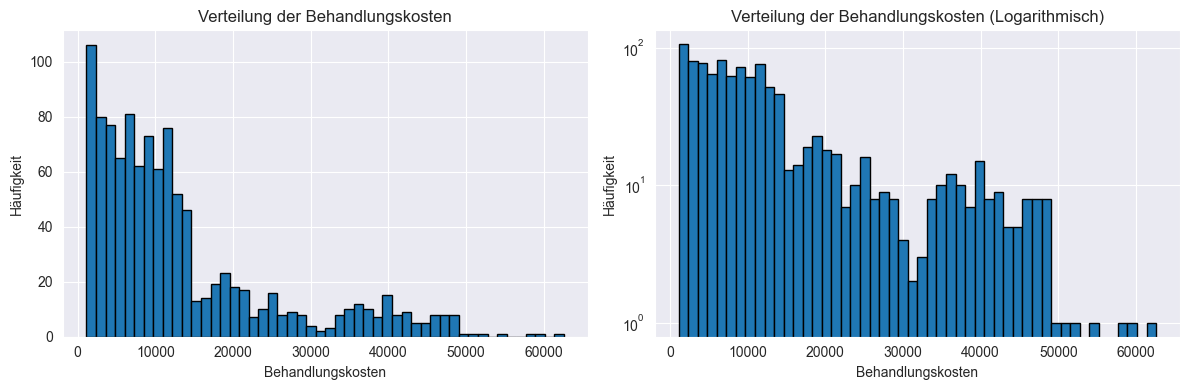

In [191]:
import matplotlib.pyplot as plt

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(train_set_explore['charges'], bins=50, edgecolor='black')
ax1.set_title('Verteilung der Behandlungskosten')
ax1.set_xlabel('Behandlungskosten')
ax1.set_ylabel('Häufigkeit')

ax2.hist(train_set_explore['charges'], bins=50, edgecolor='black', log=True)
ax2.set_title('Verteilung der Behandlungskosten (Logarithmisch)')
ax2.set_xlabel('Behandlungskosten')
ax2.set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

Die Verteilung von `charges` ist rechtsschief. Zur optimalen Verwendung der Daten wird `charges` logarithmisch transformiert. Es ist zu erkennen, dass die Verteilung normalverteilt ist, was für das Training von Regressionmodellen optimaler funktioniert. Ab Behandlungskosten von 50.000 sind einige Ausreißer zu erkennen.

Nun werden die Behandlungskosten anhand des Raucherstatus `smoker` geplottet. 

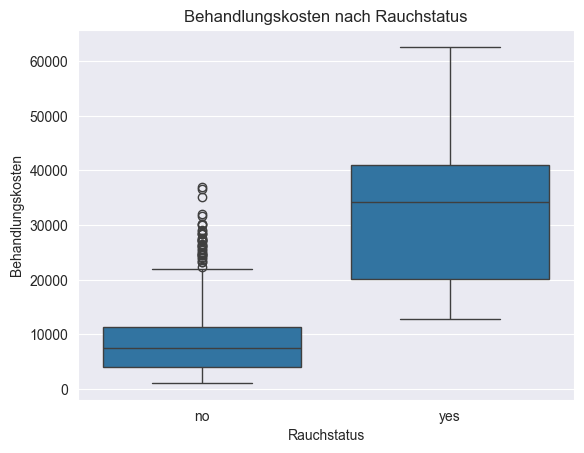

In [192]:
import seaborn as sns

plt.figure()
sns.boxplot(x='smoker', y='charges', data=train_set_explore)
plt.title('Behandlungskosten nach Rauchstatus')
plt.xlabel('Rauchstatus')
plt.ylabel('Behandlungskosten')
plt.show()

Es ist zu erkennen, dass Raucher höhere durchschnittliche Behandlungskosten haben als Nicht-Raucher. Das Attribut `smoker` hat also einen Einfluss auf die `charges`. Hier werden die Ausreißer nochmal bestätigt. Sehr gut ist dies zu erkennen bei den Nicht-Rauchern.

Es werden die Verteilungen von `age` und `children` im Histogramm dargestellt.

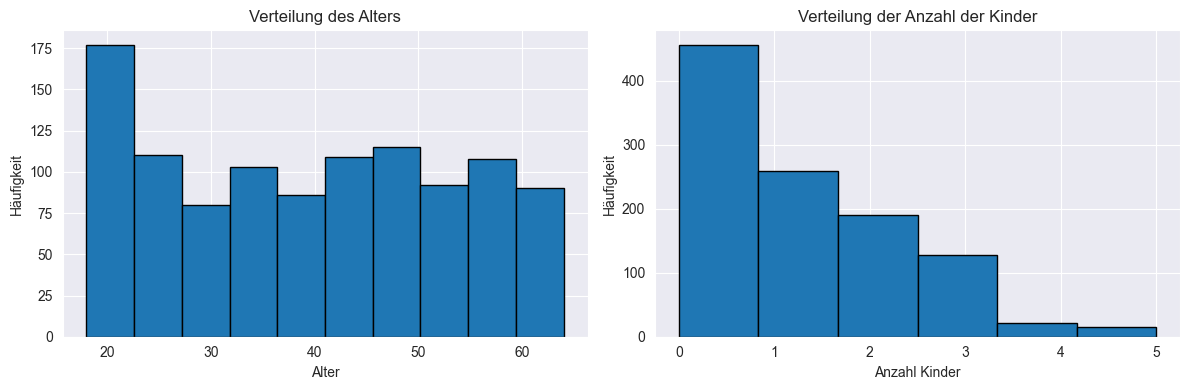

In [193]:
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(train_set_explore['age'], bins=10, edgecolor='black')
ax1.set_title('Verteilung des Alters')
ax1.set_xlabel('Alter')
ax1.set_ylabel('Häufigkeit')

ax2.hist(train_set_explore['children'], bins=6, edgecolor='black')
ax2.set_title('Verteilung der Anzahl der Kinder')
ax2.set_xlabel('Anzahl Kinder')
ax2.set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

Die meisten Patienten im Datensatz sind im Alter von 18 bis 22. Der Rest ist gleichverteilt. Am häufigsten haben die Patienten keine oder ein Kind. Mit zunehmender Anzahl an Kindern nimmt die Häufigkeit ab.

Es werden die `charges` abhängig von `age` und vom `bmi` dargestellt.

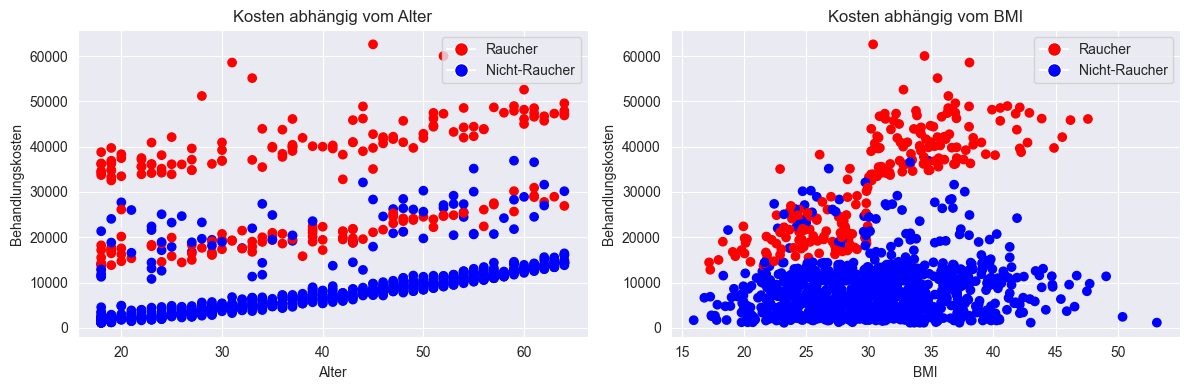

In [194]:
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


scatter1 = ax1.scatter(train_set_explore['age'], train_set_explore['charges'], c=train_set_explore['smoker'].map({'yes': 'red', 'no': 'blue'}))
ax1.set_title('Kosten abhängig vom Alter')
ax1.set_xlabel('Alter')
ax1.set_ylabel('Behandlungskosten')

ax2.scatter(train_set_explore['bmi'], train_set_explore['charges'], c=train_set_explore['smoker'].map({'yes': 'red', 'no': 'blue'}))
ax2.set_title('Kosten abhängig vom BMI')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Behandlungskosten')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Raucher'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Nicht-Raucher')]
ax1.legend(handles=legend_elements, loc='upper right')
ax2.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

Jeder Punkt im jeweiligen Diagramm repräsentiert einen Patienten. Eine hohe positive Korrelation zwischen `charges` und `bmi` kann erkannt werden, das heißt, dass höhere BMI-Werte mit höheren Behandlungskosten verbunden sind. Gleiches ist mit dem Attribut `age` zu erkennen. <br>

 Es ist zu erkennen, dass die Kosten mit zunehmenden Alter steigen sowohl bei Nicht-Rauchern als auch bei Rauchern. Die Kosten sind im Allgemeinen bei den Rauchern höher. Dies bestätigt die Erkenntnisse aus den vorherigen Visualisierungen. <br>
 
Ab einem BMI-Wert von 30 spricht man von Adipositas. Dies ist wohl mit erheblich höheren Behandlungskosten verbunden, was auch im Diagramm zu erkennen ist. Allerdings gilt dies nur für Raucher. Bei den Nicht-Rauchern ist diese Ausprägung nicht zu beobachten.

### 3.5 Korrelationen <a class="anchor" id="id3.5"></a>

Attribute wie `region`, `sex` und `smoker` sind kategorische Werte und werden in numerische umgewandelt, um eine Korrelationsmatrix erstellen zu können.

In [195]:
train_set_explore_encoded = pd.get_dummies(train_set_explore, columns=['sex', 'smoker', 'region'])

Zur Überprüfung wird `head()` ausgegeben.

In [196]:
train_set_explore_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,9193.83850,True,False,True,False,False,True,False,False
1285,47,24.32,0,8534.67180,True,False,True,False,True,False,False,False
1142,52,24.86,0,27117.99378,True,False,True,False,False,False,True,False
969,39,34.32,5,8596.82780,True,False,True,False,False,False,True,False
486,54,21.47,3,12475.35130,True,False,True,False,False,True,False,False


Die Attribute `region`, `sex` und `smoker` sind nun umgewandelt in numerische bzw. True/False-Werte. So können sie für die Korrelationsmatrix verwendet werden. Die Korrelationsmatrix wird erstellt.

In [197]:
correlation_matrix = train_set_explore_encoded.corr()

Mit der `heatmap()` von Seaborn wird die Matrix visualisiert.

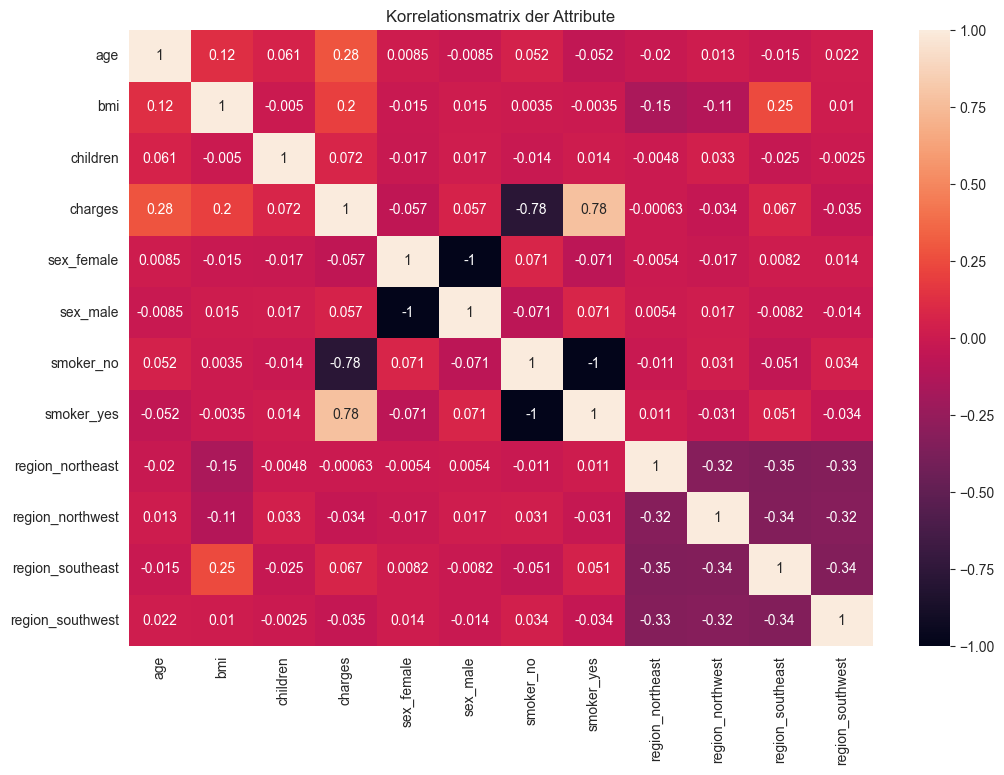

In [198]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Korrelationsmatrix der Attribute')
plt.show()

Aus der Heatmap der Matrix ist zu erkennen und wird auch bestätigt, dass es eine starke positive Korrelation zwischen `charges` und `smoker` (Rauchstatus) gibt, was darauf hindeutet, dass Raucher höhere Behandlungskosten haben. Auch das Alter `age` und der `bmi` zeigen eine positive Korrelation mit den Behandlungskosten. Zusätzlich wird beobachtet, dass die Region `southeast` eine vergleichsweise höhere Korrelation mit dem `bmi` gegenüber der anderen Regionen aufweist.

### 3.6 Festlegung der notwendigen Transformationen <a class="anchor" id="id3.6"></a>

1. **Log-Transformation der Behandlungskosten**
   - Die Spalte `charges` soll logarithmisch transformiert werden, um die rechtsschiefe Verteilung zu normalisieren.

2. **Standardisierung der numerischen Variablen**
   - Alle numerischen Features werden standardisiert, um einen Mittelwert von 0 und eine Standardabweichung von 1 zu haben.

3. **One-Hot-Encoding der kategorialen Variablen**
   - Die kategorialen Variablen `sex`, `region` und `smoker` sollen mittels One-Hot-Encoding in numerische Formate umgewandelt werden. Dabei soll immer eine Kategorie pro Features gedroppt werden mit `drop = first`, um kollineare Feature-Probleme zu verhindern.

4. **Umgang mit Ausreißern:**
   - Ausreißer sollen mithilfe der Z-Score-Methode entfernt werden, wobei: $x$ der Beobachtungswert ist, $\mu$ der Mittelwert der Population ist und $\sigma$ die Standardabweichung der Population ist.
   Wenn der z-Wert über 3 ist, wird der Ausreißer entfernt. Bei einer optimalen Normalverteilung wären 99,7 % der Datenpunkte keine Ausreißer. Der Z-Score wird mit folgender Gleichung berechnet:
    $$
    z = \frac{(x - \mu)}{\sigma}
    $$

5. **Umgang mit fehlenden Werten**
    - Fehlende Werte werden mit dem `SimpleImputer()` aufgefüllt. Für die numerischen Werte wird die `strategy = mean` verwendet, da Ausreißer entfernt wurden und so der Mittelwert optimal fehlende Werte auffüllt. Kategorische Werte sollen mit `strategy = most_frequent` aufgefüllt werden.





### 3.7 Ergebnisse <a class="anchor" id="id3.7"></a>

**Übersicht der Daten**
- Der Datensatz enthält 1338 Einträge mit 7 Merkmalen und der Zielvariable `charges`.
- Die Merkmale umfassen demografische Informationen wie Alter, Geschlecht, BMI, Anzahl der Kinder, Rauchstatus und Wohnregion.

**Verteilungen der Merkmale**
- Die Verteilung der Behandlungskosten ist rechtsschief, was auf einige hohe Kostenfälle hinweist.
- Das Boxplot der Behandlungskosten nach Rauchstatus zeigt, dass Raucher tendenziell höhere Behandlungskosten haben als Nichtraucher.

**Korrelationen**
- Es gibt eine starke positive Korrelation zwischen "charges" und "smoker" (Rauchstatus), was darauf hindeutet, dass Raucher höhere Behandlungskosten haben.
- Auch das Alter und der BMI zeigen eine positive Korrelation mit den Behandlungskosten.

**Fazit**
- Die explorative Analyse hat wertvolle Einblicke in die Struktur und Beziehungen der Daten geliefert. Diese Erkenntnisse werden bei der Auswahl und Vorbereitung der Modelle berücksichtigt. Es werden alle Features zum Trainieren der Modelle verwendet.


## 4 Prepare the Data <a class="anchor" id="id4"></a>

### 4.1 Ausreißer entfernen <a class="anchor" id="id4.1"></a>

Die Funktion `remove_outliers()` bereinigt die Daten, indem sie Ausreißer identifiziert und entfernt. Diese Schritte sind entscheidend, um die Qualität der Daten zu verbessern und die Leistung der nachfolgenden Modelle zu erhöhen. In einem typischen Workflow wird diese Funktion nach der initialen Datenanalyse und vor der Modellbildung angewendet, um sicherzustellen, dass die Daten frei von extremen und potenziell störenden Werten sind.

In [199]:
import pandas as pd
import numpy as np

def remove_outliers(data, columns, threshold):

    filtered_data = data.copy()
    outliers_dataframes = []
    outliers_values = []

    for col in columns:
        z_scores = np.abs((filtered_data[col] - filtered_data[col].mean()) / filtered_data[col].std())
        outliers = z_scores > threshold

        outliers_dataframes.append(filtered_data[outliers])
        outliers_values.extend([col] * np.sum(outliers))

        filtered_data = filtered_data[~outliers]

        removed_outliers = pd.concat(outliers_dataframes)
        removed_outliers['outlier_values'] = outliers_values

    return filtered_data, removed_outliers

Die Funktion `remove_outliers()` gibt die gefilterten Daten und die entfernten Ausreißer zurück. Das verantwortliche Attribut für das Entfernen des Ausreißers wird in `removed_outliers` gespeichert. Ausreißer werden entfernt, wenn der Z-Score über dem `threshold` ist. <br>

Mit `info()` wird die Anzahl aller Datenpunkten im `train_set` ausgegeben.

In [200]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1070 non-null   int64   
 1   sex       1070 non-null   category
 2   bmi       1070 non-null   float64 
 3   children  1070 non-null   int64   
 4   smoker    1070 non-null   category
 5   region    1070 non-null   category
 6   charges   1070 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 45.4 KB


Die Anzahl der Datenpunkte im `train_set` beträgt vor dem Entfernen der Ausreißer 1070. <br>

Nun wird mit der Funktion `remove_outliers()` die Ausreißer aus dem `train_set` entfernt. Nur die Ausreißer der numerischen Attribute `age`, `bmi` und `charges` werden entfernt. `children` wird nicht beachtet, da sonst alle Patienten mit 5 Kindern entfernt werden. Eine Anzahl von 5 Kindern ist allerdings realistisch. Der Schwellenwert für das Entfernen wird auf `threshold=3` gesetzt. 

In [201]:
train_set, outliers_df = remove_outliers(train_set, columns=['age', 'bmi', 'charges'], threshold=3)

Nun wird die aktualisierte Datenpunktanzahl nach Entfernen der Ausreißer überprüft.

In [202]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1060 non-null   int64   
 1   sex       1060 non-null   category
 2   bmi       1060 non-null   float64 
 3   children  1060 non-null   int64   
 4   smoker    1060 non-null   category
 5   region    1060 non-null   category
 6   charges   1060 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 45.0 KB


Die Anzahl der Datenpunkte im `train_set` beträgt nach dem Entfernen der Ausreißer 1060. Das heißt, es wurden 10 Ausreißer erkannt und entfernt.<br>

Zur Überprüfung werden die entfernten Datenpunkte ausgegeben. `outliers_values` beschreibt das verantwortliche Attribut für das Entfernen des Ausreißers.

In [203]:
outliers_df.head(30)

,age,sex,bmi,children,smoker,region,charges,outlier_values
847,23,male,50.380,1,no,southeast,2438.05520,bmi
1317,18,male,53.130,0,no,southeast,1163.46270,bmi
116,58,male,49.060,0,no,southeast,11381.32540,bmi
1146,60,male,32.800,0,yes,southwest,52590.82939,charges
1230,52,male,34.485,3,yes,northwest,60021.39897,charges
1241,64,male,36.960,2,yes,southeast,49577.66240,charges
819,33,female,35.530,0,yes,northwest,55135.40209,charges
1300,45,male,30.360,0,yes,southeast,62592.87309,charges
577,31,female,38.095,1,yes,northeast,58571.07448,charges
34,28,male,36.400,1,yes,southwest,51194.55914,charges


Die meisten Datenpunkte wurden aufgrund von `charges`  und einige aufgrund vom `bmi` entfernt. 

### 4.2 Trainingsset aufteilen in Features und Target <a class="anchor" id="id4.2"></a>

`train_set` wird in Features `x_train` und in die Targetvariabel `y_train` aufgeteilt. `x_train` beinhaltet alle Attribute außer `charges` und `y_train` beinhaltet nur das Attribut `charges`. Es werden alle Attribute als Feature benutzt außer `charges`, das heißt kein Attribut wird entfernt.

In [204]:
x_train = train_set.drop(columns=['charges'], axis=1)
y_train = train_set['charges']

### 4.3 Daten transformieren <a class="anchor" id="id4.3"></a>

Die Aggregation von Daten wird nicht durchgeführt, da bereits ein Muster und auch die Features mit der Zielvariable korrelieren. <br>

Das Auffüllen von fehlenden Daten ist nicht notwendig, da es keine fehlenden Werte im Datensatz gibt (siehe 3.2). Allerdings können im Testdatensatz Daten fehlen. Daher wird ein `SimpleImputer()` auf die Daten angewendet. <br> 

Die Features werden aufgeteilt in numerische und kategorische Features anhand von 2.3, um einen passenden Transformer anzuwenden.

In [205]:
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

Für numerische Werte wird der `SimpleImputer()` mit der Strategie `mean` verwendet. `mean` wurde gewählt, da Ausreißer entfernt wurden. Mit der Strategie `median` würden Ausreißer besser berücksichtigt werden. Allerdings sind diese entfernt worden. Als Nächstes wird der `StandardScaler()` auf die numerischen Werte angewendet. Für die Parameter wurden die Standardwerte eingesetzt, da sie keinen großen Einfluss auf die Transformation haben. Beide Transformer werden mit einer `Pipeline()` zusammengefügt.

In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

Für kategorische Werte wird auch der `SimpleImputer()` verwendet. Allerdings hier mit der Strategie `most_frequent`. Eine andere Strategie ist bei kategorischen Werten nicht zielführend. Zum Transformieren der kategorischen Werte in brauchbare numerische Werte wird der `OneHotEncoder()` verwendet. Die Kategorien werden automatisch erkannt. Eine Kategorie pro Features wird entfernt mit `drop = first`, um kollineare Feature-Probleme zu verhindern. Dadurch, dass keine `min_freqeuncy` gesetzt wird, ist `handle_unknown` nicht relevant für den Encoder. Beides wird mit der `Pipeline()` zusammengefügt.

In [207]:
from sklearn.preprocessing import OneHotEncoder

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

Ein `preprocessor` wird mit `ColumnTransformer()` erstellt. Für alle `num_features` wird der `num_transformer` und für alle `cat_features` wird der `cat_transformer` angewendet.

In [208]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

## 5 Select and train the models <a class="anchor" id="id5"></a>

### 5.1 Auswahl des dritten Modells <a class="anchor" id="id5.1"></a>

<span style="color:yellow">erklären</span> https://www.kaggle.com/code/uzairabdullah/medical-insurance-cost-prediction

### 5.2 Erklärung der ausgewählten Modelle <a class="anchor" id="id5.2"></a>

<span style="color:yellow">erklären</span>

### 5.3 Plan für Modelltraining <a class="anchor" id="id5.3"></a>

<span style="color:yellow">erklären</span>

### 5.4 Modelle erstellen <a class="anchor" id="id5.4"></a>

Die vorgegeben Methoden `Linear Regression` und `Support Vektor Regression` werden verwendet. Zusätzlich wird als vorausgewählte dritte Methode `Random Forest Regression` gewählt. Diese soll zur Überprüfung der Effektivität mit weiteren Methoden wie `Ridge Regression`, `Lasso Regression` und `Decision Tree Regression` verglichen werden. Diese wurden aufgrund der häufigen Verwendung in bereits vorhandenen Lösungen ausgewählt. Die Standardparameter aller Regressionsmodelle werden verwendet, um das Hyperparametertuning nicht vorabzugreifen.

In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

### 5.5 Modelle trainieren und validieren <a class="anchor" id="id5.5"></a>

<span style="color:yellow">erklären</span>

In [210]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

<span style="color:yellow">erklären</span>

In [211]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score

def evaluate_model_with_cv(model, x, y, cv):
    mse_scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, x, y, scoring='r2', cv=cv)
    rmse_scores = np.sqrt(-mse_scores)
    return rmse_scores, r2_scores

<span style="color:yellow">erklären</span>

In [212]:
def create_full_pipeline(model):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=model,
            func=np.log,
            inverse_func=np.exp
        ))
    ])

<span style="color:yellow">erklären</span>

In [213]:
cv_results = {'Model': [], 'RMSE Mean': [], 'RMSE Std': [], 'R2 Mean': [], 'R2 Std': []}

for name, model in models.items():
    pipeline = create_full_pipeline(model)
    rmse_scores, r2_scores = evaluate_model_with_cv(pipeline, x_train, y_train, kf)
    cv_results['Model'].append(name)
    cv_results['RMSE Mean'].append(rmse_scores.mean())
    cv_results['RMSE Std'].append(rmse_scores.std())
    cv_results['R2 Mean'].append(r2_scores.mean())
    cv_results['R2 Std'].append(r2_scores.std())

### 5.6 Performance der Modelle <a class="anchor" id="id5.6"></a>

<span style="color:yellow">erklären</span>

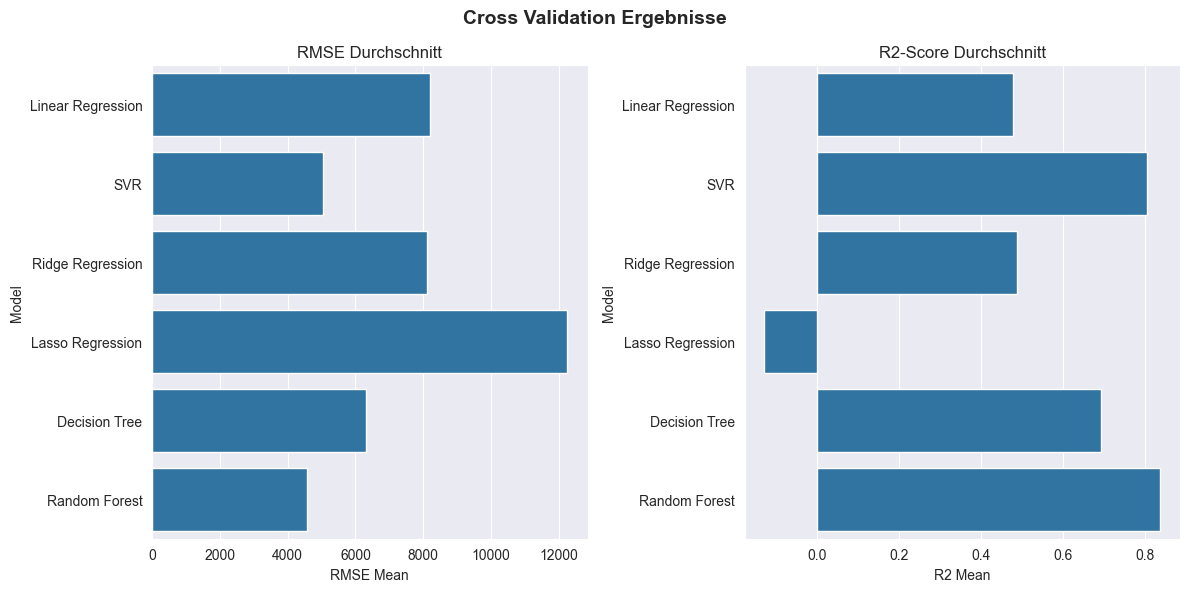

In [214]:
cv_results_df = pd.DataFrame(cv_results)

plt.figure(figsize=(12, 6))
plt.suptitle('Cross Validation Ergebnisse', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 1)
sns.barplot(x='RMSE Mean', y='Model', data=cv_results_df)
plt.title('RMSE Durchschnitt')

plt.subplot(1, 2, 2)
sns.barplot(x='R2 Mean', y='Model', data=cv_results_df)
plt.title('R2-Score Durchschnitt')

plt.tight_layout()
plt.show()

<span style="color:yellow">erklären</span>


In [215]:
selected_models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
}

### 5.7 Signifikante Parameter der Modelle <a class="anchor" id="id5.7"></a>

<span style="color:yellow">erklären</span>

In [216]:
def get_model_params(models):
    params_list = []

    for name, model in models.items():
        params_dict = {'Model': name}
        params = model.get_params()
        for param_name, param_value in params.items():
            params_dict[param_name] = param_value
        params_list.append(params_dict)

    params_df = pd.DataFrame(params_list)
    return params_df

<span style="color:yellow">erklären</span>


In [217]:
get_model_params(selected_models)

,Model,copy_X,fit_intercept,n_jobs,positive,C,cache_size,coef0,degree,epsilon,...,max_samples,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,monotonic_cst,n_estimators,oob_score,random_state,warm_start
0,Linear Regression,True,True,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SVR,NaN,NaN,NaN,NaN,1.0,200.0,0.0,3.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,2.0,0.0,NaN,100.0,False,NaN,False


<span style="color:yellow">erklären</span>

## 6 Fine-Tune the models <a class="anchor" id="id6"></a>

### 6.1 Hyperparametertuning mit `GridSearchCV()` und `RandomizedSearchCV()` <a class="anchor" id="id6.1"></a>

<span style="color:yellow">erklären</span>


In [218]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def perform_search(X, y, models, preprocessor, cv, search_type):
    best_models = {}
    if search_type == 'grid':
        print('-' * 40 + 'Grid Search' + '-' * 40)
    elif search_type == 'random':
        print('-' * 40 + 'Random Search' + '-' * 40)

    for name, model, params in models:
        model_pipeline = create_full_pipeline(model)

        if search_type == 'grid':
            search = GridSearchCV(estimator=model_pipeline, param_grid=params, cv=cv, scoring='r2', verbose=1, n_jobs=-1)
        elif search_type == 'random':
            search = RandomizedSearchCV(estimator=model_pipeline, param_distributions=params, n_iter=50, cv=cv, scoring='r2', verbose=1, n_jobs=-1)

        search.fit(X, y)

        best_models[name] = {
            'model': search.best_estimator_,
            'params': search.best_params_,
            'score': search.best_score_
        }

        print(f"Beste Parameter für {name}:")
        print(search.best_params_)
        print(f"Bester {name} R2-Score: {search.best_score_}")
        print()

    return best_models


<span style="color:yellow">erklären</span>

### 6.2 Festlegung des Parameter-Grids und Auswertung der Ergebnisse <a class="anchor" id="id6.2"></a>

<span style="color:yellow">erklären</span>

In [219]:
models_to_search = [
    ('Linear Regression', LinearRegression(), {
        'model__regressor__fit_intercept': [True, False]
    }),
    ('SVR', SVR(), {
        'model__regressor__kernel': ['linear', 'poly', 'rbf'],
        'model__regressor__C': [0.1, 1, 10],
        'model__regressor__epsilon': [0.01, 0.1, 0.5]
    }),
    ('Random Forest Regression', RandomForestRegressor(), {
        'model__regressor__n_estimators': [50, 100, 200],
        'model__regressor__max_depth': [None, 10, 20],
        'model__regressor__min_samples_split': [2, 5, 10],
        'model__regressor__min_samples_leaf': [1, 2, 4]
    })
]

<span style="color:yellow">erklären</span>

In [220]:
best_models_grid = perform_search(x_train, y_train, models_to_search, preprocessor, kf, 'grid')
best_models_random = perform_search(x_train, y_train, models_to_search, preprocessor, kf, 'random')

----------------------------------------Grid Search----------------------------------------
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Beste Parameter für Linear Regression:
{'model__regressor__fit_intercept': True}
Bester Linear Regression R2-Score: 0.47777259009165435

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Beste Parameter für SVR:
{'model__regressor__C': 1, 'model__regressor__epsilon': 0.1, 'model__regressor__kernel': 'rbf'}
Bester SVR R2-Score: 0.805374161334688

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Beste Parameter für Random Forest Regression:
{'model__regressor__max_depth': 10, 'model__regressor__min_samples_leaf': 4, 'model__regressor__min_samples_split': 5, 'model__regressor__n_estimators': 200}
Bester Random Forest Regression R2-Score: 0.8470605412407707

----------------------------------------Random Search----------------------------------------
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Beste 

C:\Users\markj\Documents\Studium\Master Maschinenbau TH Köln\Machine Learning\ML_SoSe24\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\markj\Documents\Studium\Master Maschinenbau TH Köln\Machine Learning\ML_SoSe24\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Beste Parameter für SVR:
{'model__regressor__kernel': 'rbf', 'model__regressor__epsilon': 0.1, 'model__regressor__C': 1}
Bester SVR R2-Score: 0.805374161334688

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Beste Parameter für Random Forest Regression:
{'model__regressor__n_estimators': 50, 'model__regressor__min_samples_split': 10, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': None}
Bester Random Forest Regression R2-Score: 0.8467954153512924



In [221]:
best_models_grid_df = pd.DataFrame(best_models_grid)

In [222]:
best_models_grid_df.head()

,Linear Regression,SVR,Random Forest Regression
model,"(ColumnTransformer(transformers=[('num',\n ...","(ColumnTransformer(transformers=[('num',\n ...","(ColumnTransformer(transformers=[('num',\n ..."
params,{'model__regressor__fit_intercept': True},"{'model__regressor__C': 1, 'model__regressor__...","{'model__regressor__max_depth': 10, 'model__re..."
score,0.477773,0.805374,0.847061


<span style="color:yellow">erklären</span>

### 6.3 Finale Modell trainieren <a class="anchor" id="id6.3"></a>

<span style="color:yellow">erklären</span>

In [223]:
final_estimator = best_models_grid['Random Forest Regression']['model']

<span style="color:yellow">erklären</span>


In [224]:
final_estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(max_depth=10,
                                                                            min_samples_leaf=4,
                                                                            min_samples_split=5,
                                                                            n_estimators=200)))])

<span style="color:yellow">erklären</span>


### 6.4 Feature-Wichtigkeit <a class="anchor" id="id6.4"></a>

<span style="color:yellow">erklären</span>


In [225]:
model = final_estimator.named_steps['model'].regressor_

feature_importances = model.feature_importances_
x_train_encoded = pd.get_dummies(x_train, columns=['sex', 'smoker', 'region'], drop_first=True)
features = x_train_encoded.columns


importance_df = pd.DataFrame({
    'Importance': feature_importances,
    'Features': features
})

importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

<span style="color:yellow">erklären</span>


In [226]:
importance_df.head(20)

,Importance,Features
0,0.466924,smoker_yes
1,0.405126,age
2,0.063216,bmi
3,0.043258,children
4,0.008991,sex_male
5,0.004671,region_southwest
6,0.004125,region_southeast
7,0.003689,region_northwest


### 6.5 Auswertung des finalen Modells anhand Testset <a class="anchor" id="id6.5"></a>

<span style="color:yellow">erklären</span>


In [227]:
x_test = test_set.drop(columns=['charges'], axis=1)
y_test = test_set['charges']

<span style="color:yellow">erklären</span>


In [228]:
final_results = {'Model': [], 'RMSE': [], 'R2 Score': [], 'y_pred': []}

y_pred = final_estimator.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
final_results['Model'].append(name)
final_results['RMSE'].append(rmse)
final_results['R2 Score'].append(r2)
final_results['y_pred'].append(y_pred)

final_results_df = pd.DataFrame(final_results)

<span style="color:yellow">erklären</span>


In [229]:
final_results_df.head()

,Model,RMSE,R2 Score,y_pred
0,Random Forest,4287.155363,0.881611,"[9345.056318033678, 5065.6356234693185, 27428...."


<span style="color:yellow">erklären</span>


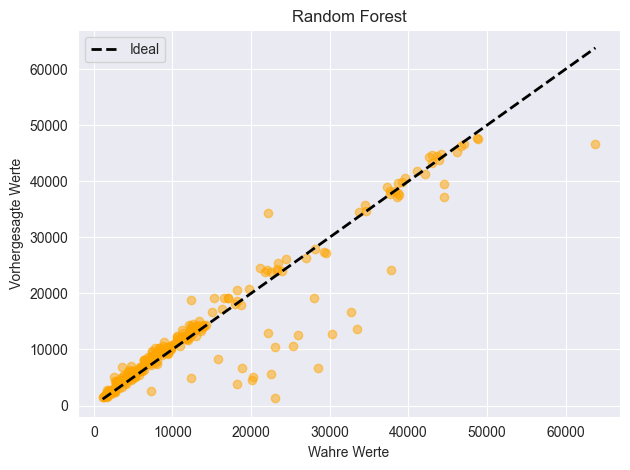

In [232]:
y_pred = final_results_df.iloc[0]['y_pred']

plt.scatter(y_test, y_pred, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')

plt.xlabel('Wahre Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Random Forest')
plt.legend()

plt.tight_layout()
plt.show()

<span style="color:yellow">erklären</span>


In [231]:
from scipy import stats

confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
generalization_error = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))
print('Generalisierungs-Error:', generalization_error)

Generalisierungs-Error: [3208.47656846 5144.42225328]


<span style="color:yellow">erklären</span>


## 7 Zusammenfassung <a class="anchor" id="id7"></a>

<span style="color:yellow">erklären</span>
